#### Load data

In [2]:
import pandas as pd
df = pd.read_csv('ClientTrackExport-disabilities4.csv')
df.fillna(0).head()

,Age,Ethnicity,education,Alcohol Abuse,Chronic Health Condition,CountOfDisablingConditions,Developmental Disability,DisablingCondition,Drug Abuse,Felony Conviction,History of Foster Care,HIV/AIDS,Mental Health,Other,Physical Disability,ScoreRisks
0,62,BL,0.0,1.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,4
1,44,WH,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3
2,44,WH,0.0,1.0,1.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3
3,66,WH,0.0,1.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2
4,64,BL,0.0,1.0,0.0,10.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2


#### Fill nulls with 0s and create X and y

In [64]:
X = df.fillna(0).iloc[:, :-1]
y = df.iloc[:, -1].values


In [65]:
X.head()

,Age,Ethnicity,education,Alcohol Abuse,Chronic Health Condition,CountOfDisablingConditions,Developmental Disability,DisablingCondition,Drug Abuse,Felony Conviction,History of Foster Care,HIV/AIDS,Mental Health,Other,Physical Disability
0,62,BL,0.0,1.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,44,WH,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,44,WH,0.0,1.0,1.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,66,WH,0.0,1.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,64,BL,0.0,1.0,0.0,10.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


#### Convert categorical data to numerical using one-hot encoder

In [66]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [67]:
ohe = OneHotEncoder()

X_ethnicity = df.fillna('NA').iloc[:, [1]].values
ethnicity_data = ohe.fit_transform(X_ethnicity).toarray()
ethnicity_df = pd.DataFrame(ethnicity_data)
ethnicity_df.columns = ohe.get_feature_names()
ethnicity_df.head()

,x0_BL,x0_HI,x0_NA,x0_WH
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0


#### Scale age and education data

In [68]:
age_std_scale = StandardScaler()
edu_std_scale = StandardScaler()

numeric_data = df.fillna(0).iloc[:, [0,2]].values
numeric_df = pd.DataFrame(numeric_data, dtype=object)
numeric_df.columns = ['age', 'education']

numeric_df['age'] = age_std_scale.fit_transform(numeric_df[['age']])
numeric_df['education'] = edu_std_scale.fit_transform(numeric_df[['education']])

numeric_df.head()

,age,education
0,0.827299,-0.194538
1,-0.653399,-0.194538
2,-0.653399,-0.194538
3,1.156343,-0.194538
4,0.991821,-0.194538


#### Concatenate all data into one frame

In [69]:
rest_of_df = df.fillna(0).iloc[:, 3:14]
X_final = pd.concat([ethnicity_df, numeric_df, rest_of_df], axis = 1)
X_final.head()

,x0_BL,x0_HI,x0_NA,x0_WH,age,education,Alcohol Abuse,Chronic Health Condition,CountOfDisablingConditions,Developmental Disability,DisablingCondition,Drug Abuse,Felony Conviction,History of Foster Care,HIV/AIDS,Mental Health,Other
0,1.0,0.0,0.0,0.0,0.827299,-0.194538,1.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,-0.653399,-0.194538,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,-0.653399,-0.194538,1.0,1.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.156343,-0.194538,1.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.991821,-0.194538,1.0,0.0,10.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


#### Analyze data

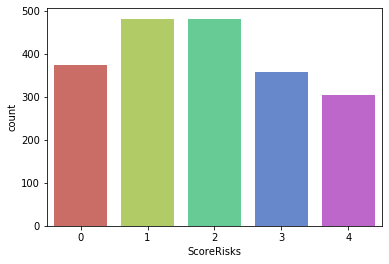

In [70]:
import seaborn as sb
sb.countplot( x= 'ScoreRisks', data=df, palette='hls')

#### Split train and test

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=0)

In [72]:
X_train.describe()

,x0_BL,x0_HI,x0_NA,x0_WH,age,education,Alcohol Abuse,Chronic Health Condition,CountOfDisablingConditions,Developmental Disability,DisablingCondition,Drug Abuse,Felony Conviction,History of Foster Care,HIV/AIDS,Mental Health,Other
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.069375,0.001250,0.905000,0.024375,-0.012380,-0.020843,0.548750,0.73750,3.675000,0.223125,0.927500,0.568125,0.595625,0.161250,0.043750,0.768750,0.062500
std,0.254170,0.035344,0.293307,0.154259,1.003373,0.927567,0.497773,0.44013,2.002031,0.416472,0.259395,0.495492,0.490924,0.367876,0.204602,0.421764,0.242137
min,0.000000,0.000000,0.000000,0.000000,-2.709924,-0.194538,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,-0.673964,-0.194538,0.000000,0.00000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.169211,-0.194538,1.000000,1.00000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.745038,-0.194538,1.000000,1.00000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.637041,8.490207,1.000000,1.00000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Correlation heatmap

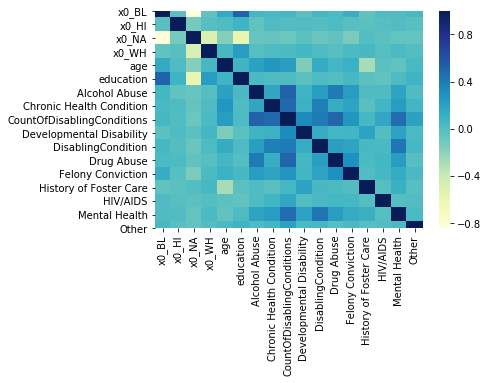

In [73]:
sb.heatmap(X_train.corr(), cmap="YlGnBu")

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 582 to 684
Data columns (total 17 columns):
x0_BL                         1600 non-null float64
x0_HI                         1600 non-null float64
x0_NA                         1600 non-null float64
x0_WH                         1600 non-null float64
age                           1600 non-null float64
education                     1600 non-null float64
Alcohol Abuse                 1600 non-null float64
Chronic Health Condition      1600 non-null float64
CountOfDisablingConditions    1600 non-null float64
Developmental Disability      1600 non-null float64
DisablingCondition            1600 non-null float64
Drug Abuse                    1600 non-null float64
Felony Conviction             1600 non-null float64
History of Foster Care        1600 non-null float64
HIV/AIDS                      1600 non-null float64
Mental Health                 1600 non-null float64
Other                         1600 non-null float64
dtypes: 

In [75]:
print(X_train.shape)
print(y_train.shape)

(1600, 17)
(1600,)


#### Logistic regression with one-over-rest 

In [76]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [77]:
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

Training accuracy: 0.34
Test accuracy: 0.2725


In [78]:
lr.intercept_

array([-0.15952106, -0.54460449, -1.1321612 , -1.70435346, -3.12638004])

In [79]:
y_pred =lr.predict(X_test)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.19      0.22        73
           1       0.31      0.31      0.31       105
           2       0.24      0.36      0.29        95
           3       0.20      0.14      0.16        64
           4       0.37      0.30      0.33        63

    accuracy                           0.27       400
   macro avg       0.27      0.26      0.26       400
weighted avg       0.27      0.27      0.27       400



#### Multinomial logistic regression

In [85]:
#reference: https://machinelearningmastery.com/multinomial-logistic-regression-with-python/ 
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(mlr, X_final, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.298 (0.026)


In [82]:
y_pred =mlr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.19      0.22        73
           1       0.32      0.33      0.33       105
           2       0.26      0.38      0.31        95
           3       0.20      0.14      0.17        64
           4       0.41      0.37      0.39        63

    accuracy                           0.29       400
   macro avg       0.29      0.28      0.28       400
weighted avg       0.29      0.29      0.29       400

